In [ ]:
!pip install tensorflow
!pip install tflearn
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 5.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=9d35db831a001636dcc499c1dc60bd7424cdffad2891fc55edcad3206ad5e58c
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import cv2  #resizing the data 
import os.path #Os modülü Python'da hazır olarak gelen , dosya ve dizinlerde kolaylıkla işlemler yapmamızı sağlayan bir modüldür.
from random import shuffle
import random
from tqdm import tqdm #looping with a progress bar
import pandas as pd
import matplotlib.pyplot as plt
import warnings #It shows some message, but the program runs. The warn() function defined in the ' warning ' module is used to show warning messages. The warning module is actually a subclass of Exception which is a built-in class in Python.
from keras.preprocessing.image import load_img
from pathlib import Path

warnings.filterwarnings('ignore')

## Download Our Datasets

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-29 10:29:01--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.25.172.252, 2600:1407:3c00:1482::317f, 2600:1407:3c00:148a::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.25.172.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   202MB/s    in 3.8s    

2022-08-29 10:29:04 (205 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



## Unzip the Dataset


In [3]:
!unzip kagglecatsanddogs_5340.zip #Extracting all the images

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

## Create DataFrame for Input and Output

In [4]:
input_path = [] #store the path of our data that is the image path
label = [] #corresponding label dog is 1 and cat is 0.

In [5]:
for class_name in os.listdir('PetImages'):
  for path in os.listdir('PetImages/'+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    
    input_path.append(os.path.join("PetImages",class_name,path))

print(input_path[1],label)


PetImages/Dog/6953.jpg [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
df = pd.DataFrame()
df['images'] = input_path
df['Label'] = label
df = df.sample(frac=1,).reset_index(drop= True) # Data was shuffled and the index was removed

df.head()

,images,Label
0,PetImages/Dog/11718.jpg,1
1,PetImages/Cat/8390.jpg,0
2,PetImages/Dog/6111.jpg,1
3,PetImages/Cat/10342.jpg,0
4,PetImages/Dog/3456.jpg,1


In [7]:
#We must remove any files in the data set that are not image data to avoid errors
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [8]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

#List of non-image type files and corrupted images

['PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

In [9]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

## Exploratary Data Analysis

In [10]:
# to display grid of images
plt.figure(figsize=(25,25))
temp =df[df['Label']==1]['images']
start = random.randint(0,len(temp))
files= temp[start:start+25]

<Figure size 1800x1800 with 0 Axes>

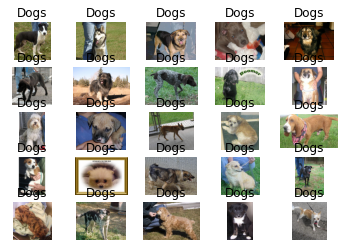

In [11]:
#display a grid of images to know the content of the data

for index,file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

  #Display of 25 random images of dogs

In [12]:
#display a grid of images to know the content of the data

plt.figure(figsize=(25,25))
temp =df[df['Label']==0]['images']
start = random.randint(0,len(temp))
files= temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

  #Display of 25 random images of cats

Output hidden; open in https://colab.research.google.com to view.

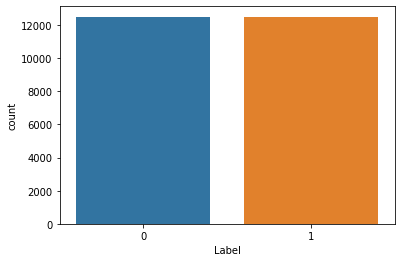

In [13]:
import seaborn as sns
sns.countplot(df['Label'])

##Create DataGenerator for the Images

In [14]:
df['Label'] = df['Label'].astype('str')
df.head()

,images,Label
0,PetImages/Dog/11718.jpg,1
1,PetImages/Cat/8390.jpg,0
2,PetImages/Dog/6111.jpg,1
3,PetImages/Cat/10342.jpg,0
4,PetImages/Dog/3456.jpg,1


In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [16]:
train.head()

,images,Label
23290,PetImages/Dog/2510.jpg,1
17785,PetImages/Dog/244.jpg,1
1020,PetImages/Dog/7509.jpg,1
12647,PetImages/Cat/4490.jpg,0
1533,PetImages/Cat/9779.jpg,0


In [ ]:
#image_dir = Path('..input/content/PetImages .png')   

In [ ]:
#image_dir

PosixPath('..input/content/PetImages .png')

In [ ]:
'''filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath') ##.astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)'''

In [ ]:
#image_df

,Filepath,Label


In [18]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator #Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)


















'''train_images = train_generator.flow_from_dataframe(train_df, 
                                                     x_col = 'Filepath',
                                                     y_col = 'Label',
                                                     target_size = (128,128),
                                                     batch_size=64,
                                                     class_mode= 'binary') #The flow_from_dataframe() method takes the Pandas DataFrame and the path to a directory and generates batches of augmented/normalized data.'''


'''val_images = val_generator.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)'''

'''test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    batch_size=512,
    shuffle=False
)'''

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


"test_images = test_generator.flow_from_dataframe(\n    dataframe=test_df,\n    x_col='Filepath',\n    y_col='Label',\n    target_size=(128, 128),\n    color_mode='rgb',\n    class_mode='binary',\n    batch_size=512,\n    shuffle=False\n)"

##Model Creation

In [19]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [20]:

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
]) 


In [ ]:
''' Dense - single dimension linear layer array

Conv2D - convolutional layer in 2 dimension

MaxPooling2D - function to get the maximum pixel value to the next layer 

Flatten - convert 2D array into a 1D array

Use Dropout if augmentation was not applied on the images to avoid over fitting

activation='relu' - used commonly for image classification models

input_shape=(128,128,3) - Resolution size of the images in an RGB color scales. If in grayscale the third parameter is 1.

activation='sigmoid' - used for binary classification '''



" Dense - single dimension linear layer array\n\nConv2D - convolutional layer in 2 dimension\n\nMaxPooling2D - function to get the maximum pixel value to the next layer \n\nFlatten - convert 2D array into a 1D array\n\nUse Dropout if augmentation was not applied on the images to avoid over fitting\n\nactivation='relu' - used commonly for image classification models\n\ninput_shape=(128,128,3) - Resolution size of the images in an RGB color scales. If in grayscale the third parameter is 1.\n\nactivation='sigmoid' - used for binary classification "

In [21]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
#model.compile() - compilation of the model

#optimizer=’adam’ - automatically adjust the learning rate for the model over the no. of epochs

#loss='binary_crossentropy' - loss function for binary outputs

In [23]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 141s 3s/step - loss: 0.7177 - accuracy: 0.5477 - val_loss: 0.6357 - val_accuracy: 0.6498
Epoch 2/10
40/40 [==============================] - 124s 3s/step - loss: 0.6152 - accuracy: 0.6590 - val_loss: 0.5683 - val_accuracy: 0.7070
Epoch 3/10
40/40 [==============================] - 124s 3s/step - loss: 0.5661 - accuracy: 0.7017 - val_loss: 0.5427 - val_accuracy: 0.7306
Epoch 4/10
40/40 [==============================] - 122s 3s/step - loss: 0.5480 - accuracy: 0.7177 - val_loss: 0.5554 - val_accuracy: 0.7316
Epoch 5/10
40/40 [==============================] - 125s 3s/step - loss: 0.5343 - accuracy: 0.7306 - val_loss: 0.4997 - val_accuracy: 0.7588
Epoch 6/10
40/40 [==============================] - 126s 3s/step - loss: 0.5029 - accuracy: 0.7504 - val_loss: 0.4852 - val_accuracy: 0.7706
Epoch 7/10
40/40 [==============================] - 125s 3s/step - loss: 0.5058 - accuracy: 0.7477 - val_loss: 0.4744 - val_accuracy: 0.7708
Epoch 8/10
40

In [24]:
model.evaluate(val_iterator)

10/10 [==============================] - 13s 1s/step - loss: 0.4419 - accuracy: 0.7942


[0.4419265687465668, 0.7942000031471252]

##Making Predictions for Individual Image

In [25]:
from keras.preprocessing import image

test_image = image.load_img(test['images'].iloc[0],  target_size = (128, 128))
print(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'


print(result)

<PIL.Image.Image image mode=RGB size=128x128 at 0x7F479043A410>
[[1.]]
